অবশ্যই! আমি তোমাকে **Image Segmentation** কি, সেটার একটা সহজ বর্ণনা এবং বাস্তব জীবনের উদাহরণ দিয়ে ব্যাখ্যা করব। তারপর দেখাবো **OpenCV (cv2)** দিয়ে কীভাবে ইমেজ সেগমেন্টেশন করা যায়, তারপর **Deep Learning** ব্যবহার করে TensorFlow দিয়ে কিভাবে করা হয়।

---

## Image Segmentation কী? (বাংলায় সহজে)

**Image Segmentation** হলো একটি প্রক্রিয়া যেখানে একটি ছবি (image) কে অনেক ছোট ছোট অংশে ভাগ করা হয়। এই অংশগুলোকে বলা হয় **segments** বা **regions**। প্রতিটি সেগমেন্ট ছবির মধ্যে একটি নির্দিষ্ট অবজেক্ট বা এরিয়া বোঝায়।

### বাস্তব জীবনের উদাহরণ:

তুমি ধরো, তুমি রাস্তার একটা ছবি নিয়ে কাজ করছো। ঐ ছবিতে রয়েছে:

* গাড়ি
* রাস্তা
* মানুষ
* গাছ

তখন ইমেজ সেগমেন্টেশন এর মাধ্যমে তুমি ছবিটাকে এমনভাবে ভাগ করবে যেন গাড়িগুলো একসাথে আলাদা অংশ, রাস্তা আলাদা অংশ, মানুষ আলাদা অংশ এবং গাছ আলাদা অংশ হিসেবে চিহ্নিত হয়।

এটা করে দিলে, তুমি পরে গাড়ি গুলো আলাদা ভাবে ট্র্যাক করতে পারবে, মানুষদের আলাদা করতে পারবে ইত্যাদি।

---

# 1. OpenCV দিয়ে সহজে Image Segmentation (Scratch থেকে)

OpenCV দিয়ে ইমেজ সেগমেন্টেশনের একটা সহজ উপায় হলো **Color-based segmentation** বা **Thresholding** করা।
একটা সিম্পল উদাহরণ দিয়ে বুঝাই:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ছবি লোড করো
img = cv2.imread('road.jpg')  # এখানে নিজের ছবি path দিবে

# OpenCV তে ছবি BGR ফরম্যাটে থাকে, RGB তে convert করি
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# আমরা ধরছি রাস্তা segment করবো - রাস্তার রঙ ধরবো (color range দিয়ে)
# HSV color space এ convert করা ভালো কারণ এটা রঙ বুঝতে সহজ করে
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# রাস্তার জন্য HSV রঙের approximate range ঠিক করি (যেমন ধূসর রঙ)
lower_gray = np.array([0, 0, 50])
upper_gray = np.array([180, 50, 200])

# Mask বানাও, যার মধ্যে এই রঙের pixel গুলো থাকবে
mask = cv2.inRange(img_hsv, lower_gray, upper_gray)

# Mask এর সাহায্যে ছবির ওই অংশ আলাদা করো
segmented_img = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

# ছবি দেখাও
plt.subplot(1,3,1), plt.imshow(img_rgb), plt.title('Original Image')
plt.subplot(1,3,2), plt.imshow(mask, cmap='gray'), plt.title('Mask')
plt.subplot(1,3,3), plt.imshow(segmented_img), plt.title('Segmented Image')
plt.show()
```

**ব্যাখ্যা:**

* আমরা রাস্তার রঙ ধরে সেগমেন্টেশন করছি।
* `cv2.inRange()` দিয়ে একটি mask তৈরি করছি যেটা শুধু ঐ নির্দিষ্ট রঙের pixel গুলো রাখবে।
* তারপর mask দিয়ে মূল ছবির ঐ অংশ আলাদা করা হচ্ছে।

---

# 2. Deep Learning দিয়ে Image Segmentation (TensorFlow দিয়ে)

OpenCV-র মতো Simple color based segmentation কাজ করে ছোট ছোট কন্ডিশনে, কিন্তু Complex ছবি বা বিভিন্ন অবজেক্ট আলাদা করার জন্য **Deep Learning** মডেল লাগে।

### Deep Learning এর জন্য জনপ্রিয় মডেলগুলো:

* **U-Net**
* **SegNet**
* **Mask R-CNN**

### উদাহরণ: TensorFlow দিয়ে U-Net model দিয়ে সেগমেন্টেশন

আমরা TensorFlow এর **tf.keras** API ব্যবহার করব। প্রথমে একটা ছোট্ট U-Net মডেল বানাবো, তারপর একটা সিম্পল ইমেজে prediction করবো।

```python
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_size=(128,128,3)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2,2))(c1)

    c2 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2,2))(c2)

    # Bottleneck
    c3 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(c3)

    # Decoder
    u4 = layers.UpSampling2D((2,2))(c3)
    u4 = layers.concatenate([u4, c2])
    c4 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(u4)
    c4 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(c4)

    u5 = layers.UpSampling2D((2,2))(c4)
    u5 = layers.concatenate([u5, c1])
    c5 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, (1,1), activation='sigmoid')(c5)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

model = unet_model()
model.summary()
```

### কিভাবে কাজ করে:

* Model input হিসেবে একটা ছবি নেয় (128x128x3)
* Output হলো সেই ছবির জন্য একটি **mask** (128x128x1), যেখানে পিক্সেল ভ্যালু 0 থেকে 1 এর মধ্যে, অর্থাৎ ঐ পিক্সেল সেগমেন্টের অংশ কি না।

---

### Deep Learning Segmentation এর জন্য ডেটা:

Deep learning মডেল কাজ করার জন্য তোমার কাছে **train images** এবং তাদের **mask images** লাগবে। Mask images গুলো হয় কালো-সাদা ছবি, যেখানে সেগমেন্ট করা অবজেক্ট সাদা (1) আর অন্য অংশ কালো (0)।

---

### বাস্তব জীবনে Deep Learning এর ব্যবহার:

তুমি যদি একটি মেডিকেল ছবি (যেমন MRI scan) নিয়ে কাজ করো, তাহলে Image Segmentation দিয়ে তুমি রোগের অংশ আলাদা করে নিতে পারবে। যেমন, টিউমার কোথায় আছে তা চিহ্নিত করা।

---

## সারাংশ:

| পদ্ধতি                | সুবিধা                               | অসুবিধা                                     |
| --------------------- | ------------------------------------ | ------------------------------------------- |
| OpenCV (Color-based)  | সহজ, দ্রুত, কোন ট্রেনিং দরকার নেই    | জটিল ছবি ও অনেক অবজেক্টে কাজ কঠিন           |
| Deep Learning (U-Net) | জটিল ছবি, বিভিন্ন অবজেক্ট চিনতে পারে | মডেল ট্রেন করতে বেশি ডেটা ও কম্পিউটেশন লাগে |

---

**তুমি চাও তাহলে আমি Deep Learning এর জন্য Data Preparation, Training, এবং Prediction step-by-step কোডও দেখাতে পারি।**

তাহলে বলো!
আর কি বিষয়ে help করবো?


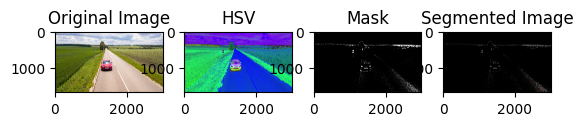

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../img/car.jpeg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# আমরা ধরছি রাস্তা segment করবো - রাস্তার রঙ ধরবো (color range দিয়ে)
# HSV color space এ convert করা ভালো কারণ এটা রঙ বুঝতে সহজ করে
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_gray = np.array([0, 0, 50])
upper_gray = np.array([180, 50, 200])

# Mask বানাও, যার মধ্যে এই রঙের pixel গুলো থাকবে
mask = cv2.inRange(img_hsv, lower_gray, upper_gray)

# make divide image part based on MASk
segmented_img = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.subplot(1,4,1), plt.imshow(img_rgb), plt.title('Original Image')
plt.subplot(1,4,2), plt.imshow(img_hsv, cmap='gray'), plt.title('HSV')
plt.subplot(1,4,3), plt.imshow(mask, cmap='gray'), plt.title('Mask')
plt.subplot(1,4,4), plt.imshow(segmented_img), plt.title('Segmented Image')
plt.show()


In [21]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf

base_dir = './dataset/CamVid'

def make_dataset(img_dir, label_dir):
    img_files = sorted(os.path.join(img_dir, f) for f in os.listdir(img_dir))
    label_files = sorted(os.path.join(label_dir, f) for f in os.listdir(label_dir))
    ds = tf.data.Dataset.from_tensor_slices((img_files, label_files))
    return ds

train_ds = make_dataset(os.path.join(base_dir, 'train'), os.path.join(base_dir, 'train_labels'))
val_ds = make_dataset(os.path.join(base_dir, 'val'), os.path.join(base_dir, 'val_labels'))
test_ds = make_dataset(os.path.join(base_dir, 'test'), os.path.join(base_dir, 'test_labels'))

print(f"Train: {len(train_ds)}, Val: {len(val_ds)}, Test: {len(test_ds)}")

Train: 369, Val: 100, Test: 232


In [22]:
def load_image(img_path, label_path):
    _img = tf.io.read_file(img_path)
    _img = tf.image.decode_png(_img, channels=3)
    _img = tf.image.convert_image_dtype(_img, tf.float32)

    _mask = tf.io.read_file(label_path)
    _mask = tf.image.decode_png(_mask, channels=1)
    return _img, _mask


train_ds = train_ds.map(load_image)
val_ds = val_ds.map(load_image)
test_ds = test_ds.map(load_image)


<_MapDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None))>

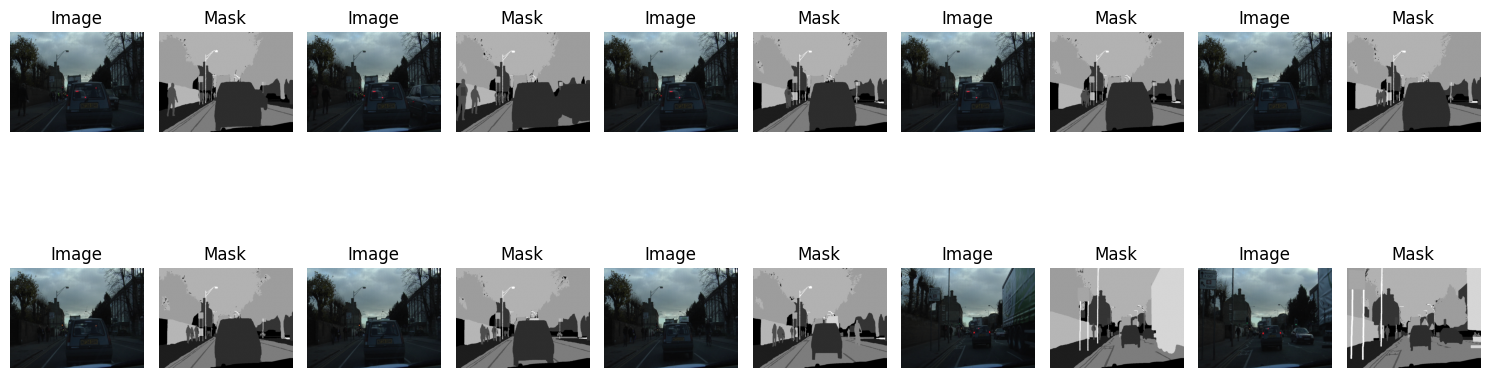

In [25]:
import matplotlib.pyplot as plt
import tensorflow as tf

samples = list(train_ds.take(10))

fig, axes = plt.subplots(2, 5*2, figsize=(15, 6))

for i, (img, mask) in enumerate(samples):
    row = i // 5
    col = (i % 5) * 2

    # Ensure img is a numpy array with values 0-1
    img_np = img.numpy()
    axes[row, col].imshow(img_np)  # RGB image
    axes[row, col].set_title("Image")
    axes[row, col].axis("off")

    # Mask
    mask_np = tf.squeeze(mask).numpy()  # remove channel dimension
    axes[row, col+1].imshow(mask_np, cmap='gray', vmin=0, vmax=mask_np.max())
    axes[row, col+1].set_title("Mask")
    axes[row, col+1].axis("off")

plt.tight_layout()
plt.show()
